# 데이터셋 소개
데이터셋은 KLUE 공식 사이트에서 제공하는 KLUE-TC(YNAT) 데이터셋과 같은 포맷을 가집니다. 제공되는 총 학습 데이터는 7,000개이며, 테스트 데이터는 47,785개 입니다.
기존 KLUE-YNAT 학습 데이터셋에 noise가 섞인 데이터가 일부 섞여있습니다.
데이터는 아래와 같이 csv 파일로 제공되며, 각 행이 하나의 데이터 샘플입니다. 최대한 깔끔하고 명확한 대회 진행을 위해, KLUE-YNAT 데이터 중 일부 feature만을 사용합니다.

- ID: 각 데이터 샘플의 고유번호 입니다.
- text: 분류의 대상이 되는 자연어 텍스트입니다. 연합 뉴스 기사의 헤드라인이며, 한국어 텍스트에 일부 영어, 한자 등의 단어가 포함되어 있습니다.
- target: 정수로 인코딩 된 라벨입니다: 
### IT과학(0), 경제(1), 사회(2), 생활문화(3), 세계(4), 스포츠(5), 정치(6)
- url: 해당 데이터 샘플의 뉴스 url 입니다.
- date: 해당 데이터 샘플의 뉴스가 작성된 날짜와 시간입니다.

In [2]:
import pandas as pd

# Load the dataset
file_path = '../data/train.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,ID,text,target,url,date
0,ynat-v1_train_00000,개포2단지 분양 앞두고 개포지구 재건축 불붙어,1,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.03.16. 오전 11:37
1,ynat-v1_train_00001,삼성전자 KBIS 2018서 셰프컬렉션 선보여,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.01.10. 오전 8:33
2,ynat-v1_train_00002,LG G6 사면 BO 이어폰이 단돈 5천원,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.04.30. 오전 10:00
3,ynat-v1_train_00003,신간 블록체인혁명 2030·남자의 고독사,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.06.13. 오전 11:49
4,ynat-v1_train_00004,이스라엘 정보당국 팔레스타인인 50명 테러 혐의로 체포,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.12.18. 오후 11:15


In [3]:
# Data quality checks

# Checking for missing values
missing_values = data.isnull().sum()

# Checking data types
data_types = data.dtypes

missing_values, data_types

(ID        0
 text      0
 target    0
 url       0
 date      0
 dtype: int64,
 ID        object
 text      object
 target     int64
 url       object
 date      object
 dtype: object)

The dataset is well-structured and does not have any missing values. The data types are as follows:

- ID: object (string)
- text: object (string)
- target: int64 (integer)
- url: object (string)
- date: object (string)

## Text Analysis

In [4]:
# Text Analysis

# Length of each text
data['text_length'] = data['text'].apply(len)

# Unique values in text
unique_texts = data['text'].nunique()

# Basic statistics for text length
text_length_stats = data['text_length'].describe()

# Example of longest and shortest texts
longest_text = data[data['text_length'] == data['text_length'].max()]['text'].iloc[0]
shortest_text = data[data['text_length'] == data['text_length'].min()]['text'].iloc[0]

text_length_stats, unique_texts, longest_text, shortest_text


(count    7000.000000
 mean       27.252714
 std         5.083921
 min         4.000000
 25%        25.000000
 50%        28.000000
 75%        31.000000
 max        44.000000
 Name: text_length, dtype: float64,
 7000,
 'MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매',
 '봄 산책')

1. Text Length:
- The lengths of the texts vary from 4 to 44 characters.
- The average length of a text is approximately 27 characters.
- The distribution of text length seems fairly consistent, as indicated by the standard deviation of about 5 characters.

2. Uniqueness:
- All 7,000 texts in the dataset are unique.

3. Examples:
- Longest Text: 'MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매' (44 characters)
- Shortest Text: '봄 산책' (4 characters)
- This analysis shows a good variation in text length, with all texts being unique, which is excellent for a dataset used for classification tasks. However, the actual content and quality of the texts, such as the presence of noise, requires a deeper, manual examination, which might not be feasible for all 7,000 entries.

## Target Label Distribution

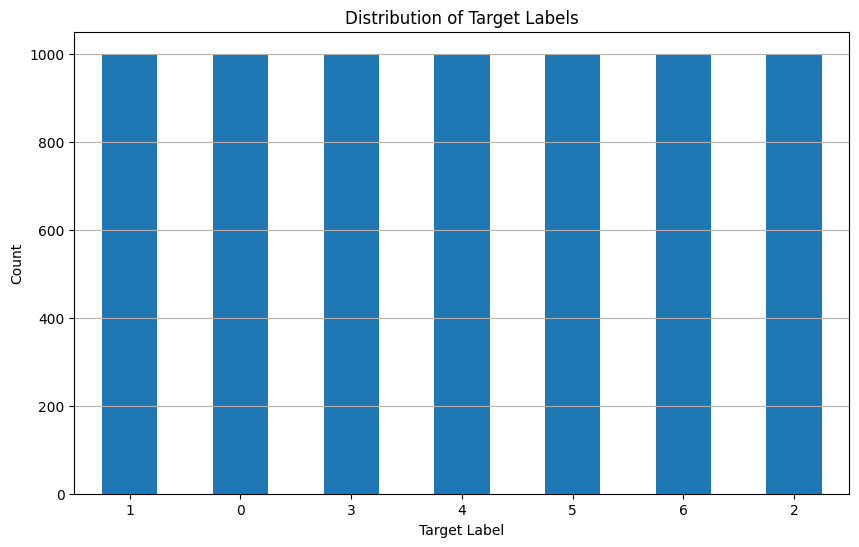

target
1    1000
0    1000
3    1000
4    1000
5    1000
6    1000
2    1000
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt

# Analyzing the distribution of the 'target' variable
target_distribution = data['target'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
target_distribution.plot(kind='bar')
plt.title('Distribution of Target Labels')
plt.xlabel('Target Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

target_distribution

# sort x label

The target labels in the dataset are evenly distributed, with each label (0 to 6) having exactly 1,000 instances. This is an ideal scenario for a classification task, as it indicates that the dataset is balanced with respect to the target labels. A balanced dataset helps in training a more accurate and unbiased model.

## Date Analysis

In [6]:
# Sampling texts for each label category for label consistency check

# Number of samples per label to inspect
samples_per_label = 5

# Sampling data
sampled_data = data.groupby('target').apply(lambda x: x.sample(samples_per_label)).reset_index(drop=True)

# Display the sampled data for manual inspection
sampled_data[['text', 'target']]


,text,target
0,에스에프에이 617억원 규모 디스플레이 장비 공급계약,0
1,안드로이드 고 탑째 초저가폰 느러난다…삼성도 함뉴,0
2,KISA 사이버보안전문다 누수 프로젝트 삼편 포상,0
3,넷마블 마블퓨처파이트 구글플레이 어워즈 후보로,0
4,한국 국제생물올림피아드 9위,0
5,특징주 에이치엘비 신약 기대감에 시총 5위 진입,1
6,특징주 BGF리테일 사흘째 오름세…주가 전망은 엇갈려종합,1
7,휘발유값 서울보다 100원 이상 싼 대구…비결은,1
8,상반기 내수시장 판매 1위 승용차 그랜저,1
9,전월세 보증금 등 금융기관 보관…안심거래 상품 나온다,1


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_ngrams(corpus, n=None, ngrams=2):
    vec = CountVectorizer(ngram_range=(ngrams, ngrams)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_ngrams = words_freq[:n]
    
    top_ngrams_words = [i[0] for i in top_ngrams]
    top_ngrams_freqs = [i[1] for i in top_ngrams]

    sns.barplot(x=top_ngrams_freqs, y=top_ngrams_words)
    plt.title(f"Top {n} {ngrams}-grams")
    plt.xlabel("Frequency")
    

In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set the Korean font
plt.rcParams['font.family'] = 'NanumGothic'  # Replace with the exact font name you found


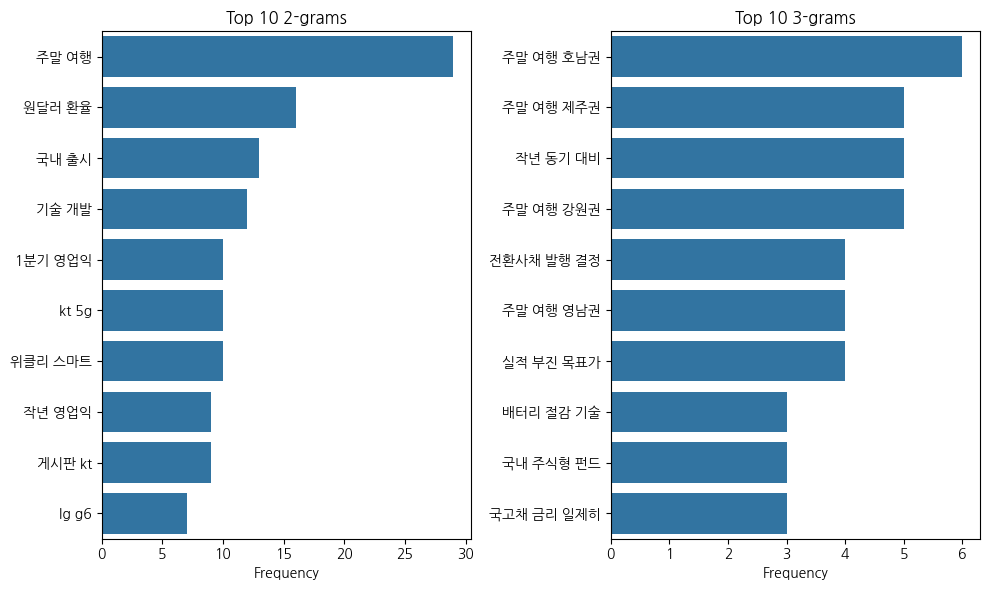

In [9]:
# Plotting the top 10 bi-grams and tri-grams
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_top_ngrams(data['text'], n=10, ngrams=2)

plt.subplot(1, 2, 2)
plot_top_ngrams(data['text'], n=10, ngrams=3)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define the n-grams you want to analyze
ngrams_to_analyze = ['주말 여행', '원달러 환율', '국내 출시', '기술 개발']

# Create a CountVectorizer, considering only the specified n-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))  # Adjust ngram_range based on your n-grams
ngram_vectors = vectorizer.fit_transform(data['text'])

# Convert to DataFrame for easier manipulation
ngram_df = pd.DataFrame(ngram_vectors.toarray(), columns=vectorizer.get_feature_names_out())

# Filter the DataFrame to include only our n-grams of interest
ngram_df = ngram_df[ngrams_to_analyze]

# Add the target labels to this DataFrame
ngram_df['target'] = data['target']

# Group by 'target' and sum to get the frequency of each n-gram per label
label_association = ngram_df.groupby('target').sum()

# Display the association of n-grams with each label
print(label_association)

        주말 여행  원달러 환율  국내 출시  기술 개발
target                             
0           0       1     10     12
1           1      14      3      0
2           2       0      0      0
3          25       1      0      0
4           1       0      0      0
5           0       0      0      0
6           0       0      0      0


In [11]:
for ngrams_to_analyze in ['주말 N 여행', '원달러 환율', '국내 출시', '기술 개발', '분기']:
    for id, text in enumerate(data['text']):
        if ngrams_to_analyze in text:
            print(id, text, data['target'][id])
    print('------------------\n')

251 주말 N 여행 제주권 겨울 더 아름답다…온통 하얗게 덮인 눈 세상 올인∼ 3
408 주말 N 여행 크리스마스엔 달콤한 키스를…프라하의 연인이 되어볼까 3
821 주말 N 여행 호남권 달빛 벗 삼아 걸어라…한낮 폭염 피해 즐기는 꿀잼 야행 3
1034 주말 N 여행 제주권 만설 한라산…그 순수한 아름다움 속으로 4
1174 주말 N 여행 호남권 X마스 트리엔 사랑이 솔솔…스케이트·썰매장 씽씽 3
1573 주말 N 여행 호남권 섬진강 물길 따라 북상하는 매화 향기…임실에 왔다 3
2059 주말 N 여행 강원권 한그루 두그루 심은 대관령 황무지…평화의 음악숲 변신 3
2110 주말 N 여행 색다른 여름 여행…유럽 속살 살피는 미니멀 캠핑 3
2279 주말 N 여행 충청권 고소한 전어 통통하게 살 오른 대하…서해안은 축제 중 2
2786 주말 N 여행 영남권 노는 물이 다른 산행 겸한 봄철 여행지 고른다면… 3
2959 주말 N 여행 강원권 호반의 도시에서 스릴 넘치는 레저 묘미에 첨벙 1
2993 주말 N 여행 영남권 한복 입고 말 타고 노란 유채밭서 인생샷 찰칵 3
3616 주말 N 여행 충청권 53도 왕의 온천 수안보에 몸 담그니 피곤이 사르르∼ 3
3916 주말 N 여행 수도권 한국 속 작은 프랑스로 여행 떠나요 3
3965 주말 N 여행 제주권 성큼 다가온 봄…5일장 나들이 정말 괜찮아요 3
3991 주말 N 여행 강원권 눈·바람·추위…하늘이 만든 해장국의 황태자 황태 3
4636 주말 N 여행 초유의 폭설 제주…온 섬이 하얗게 뒤덮히다 3
4727 주말 N 여행 옆에선 연신 잡아올리는데…산천어 낚시 꽝치지 않는 비법은 2
4790 주말 N 여행 충청권 100만개 조명으로 변신한 칠갑산 알프스 얼음분수축제 3
4797 주말 N 여행 제주권 함덕해변 여름밤 달굴 음악의 향연 3
5073 주말 N 여행 호남권 세계가 인정한 명사십리…국내 첫 수질·안전 국제인증 3
5607 주말 N 여행 호남권 4차 산업혁명의 미래…미디어아트 예술의 눈으로 보다 3
568

# 사후 분석

In [12]:
# load csv
preds_valid = pd.read_csv('valid_output.csv')
preds_valid = preds_valid[['text', 'target', 'pred']]
preds_valid

,text,target,pred
0,나태주 너를 먼저 생각한다면 미투 나올 일 없겠죠,2,2
1,손학규 曺 임명은 정권위기로 연결…지명철회 촉구,6,6
2,北 청년동맹 70돌 행사 연일보도…대북제재 겨냥 체제결속,6,6
3,가장 순수한 춤…서울국제즉흥춤축제 24일 개막,3,3
4,카슈끄지 살해 주범 빈살마 놩세자 보좌과 녀전히 실세로 활동,4,4
...,...,...,...
2095,KT파워텔 폴더형 LTE 무전기 라져 F2 출시,0,0
2096,게시판 창의재단고용노동부 강남지청 일·가정 양립 MOU,2,2
2097,카드뉴스 우주의 유리천장을 깬 흑인 여성들,0,4
2098,작년 방한 관광객 12년만에 뒷걸음…메르스 영향,2,3


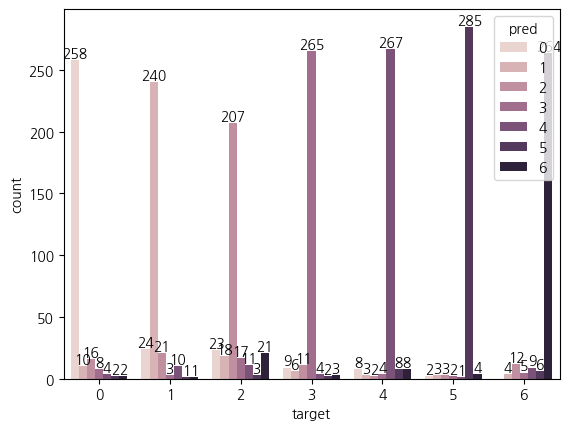

In [13]:
# visualize
import matplotlib.pyplot as plt
import seaborn as sns

# x=target, y=pred count, label sum
ax = sns.countplot(x='target', hue='pred', data=preds_valid)
for i in range(7):
    ax.bar_label(ax.containers[i], label_type='edge')

In [14]:
# get accuracy for each label
from sklearn.metrics import accuracy_score

for i in range(7):
    print(f'{i} accuracy: {accuracy_score(preds_valid["target"] == i, preds_valid["pred"] == i)}')
    counts = [sum((preds_valid["target"]==i) & (preds_valid["pred"] == j)) for j in range(7)]
    total = len(preds_valid[preds_valid["target"] == i])
    for idx, count in enumerate(counts):
        print(f'{i} -> {idx} accuracy: {count*100/total}')
    print("------------------\n")


0 accuracy: 0.9485714285714286
0 -> 0 accuracy: 86.0
0 -> 1 accuracy: 3.3333333333333335
0 -> 2 accuracy: 5.333333333333333
0 -> 3 accuracy: 2.6666666666666665
0 -> 4 accuracy: 1.3333333333333333
0 -> 5 accuracy: 0.6666666666666666
0 -> 6 accuracy: 0.6666666666666666
------------------

1 accuracy: 0.9504761904761905
1 -> 0 accuracy: 8.0
1 -> 1 accuracy: 80.0
1 -> 2 accuracy: 7.0
1 -> 3 accuracy: 1.0
1 -> 4 accuracy: 3.3333333333333335
1 -> 5 accuracy: 0.3333333333333333
1 -> 6 accuracy: 0.3333333333333333
------------------

2 accuracy: 0.9247619047619048
2 -> 0 accuracy: 7.666666666666667
2 -> 1 accuracy: 6.0
2 -> 2 accuracy: 69.0
2 -> 3 accuracy: 5.666666666666667
2 -> 4 accuracy: 3.6666666666666665
2 -> 5 accuracy: 1.0
2 -> 6 accuracy: 7.0
------------------

3 accuracy: 0.9647619047619047
3 -> 0 accuracy: 3.0
3 -> 1 accuracy: 2.0
3 -> 2 accuracy: 3.6666666666666665
3 -> 3 accuracy: 88.33333333333333
3 -> 4 accuracy: 1.3333333333333333
3 -> 5 accuracy: 0.6666666666666666
3 -> 6 acc

In [15]:
# wrong prediction
wrong_pred = preds_valid[preds_valid['target'] != preds_valid['pred']]
wrong_pred['text']

8         대통령 퇴진 4개월째 시위 수단서 저항의 상징 여성 눈길
17       공시가 인상에 경기침체속 임대료도 오르나 촉각…매물 늘 듯
35      홍세섭 영모도부터 김환기 서예까지…정동1928아트센터 개관전
36          박근혜 특활비 등 1심 선고 실시간 시청률 6.67％
52         安 日이 한 입 갖고 두말…위안부합의 당장 무효선언해야
                      ...                
2085     카카오게임즈 블루홀 개발 MMORPG 에어 국내 판권 확보
2092                          질의하는 윤한홍 의원
2097              카드뉴스 우주의 유리천장을 깬 흑인 여성들
2098           작년 방한 관광객 12년만에 뒷걸음…메르스 영향
2099      독일 11월 소비자물가 전년보다 1.1% 상승…약세 지속
Name: text, Length: 314, dtype: object

In [16]:
# print id, text, target, pred
wrong_pred[['text', 'target', 'pred']]

# save csv
wrong_pred[['text', 'target', 'pred']].to_csv('wrong_pred.csv')

In [17]:
# IT과학(0), 경제(1), 사회(2), 생활문화(3), 세계(4), 스포츠(5), 정치(6)
label_dict = {0: 'IT과학', 1: '경제', 2: '사회', 3: '생활문화', 4: '세계', 5: '스포츠', 6: '정치'}
#convert integer labels to string labels
wrong_pred['target'] = wrong_pred['target'].replace(label_dict)
wrong_pred['pred'] = wrong_pred['pred'].replace(label_dict)


/tmp/ipykernel_212003/5283289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_pred['target'] = wrong_pred['target'].replace(label_dict)
/tmp/ipykernel_212003/5283289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_pred['pred'] = wrong_pred['pred'].replace(label_dict)


In [18]:
# count pair of target and pred
wrong_pred['pair'] = wrong_pred['target'] + '-' + wrong_pred['pred']
wrong_pred

/tmp/ipykernel_212003/3543571321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_pred['pair'] = wrong_pred['target'] + '-' + wrong_pred['pred']


,text,target,pred,pair
8,대통령 퇴진 4개월째 시위 수단서 저항의 상징 여성 눈길,정치,세계,정치-세계
17,공시가 인상에 경기침체속 임대료도 오르나 촉각…매물 늘 듯,스포츠,경제,스포츠-경제
35,홍세섭 영모도부터 김환기 서예까지…정동1928아트센터 개관전,사회,생활문화,사회-생활문화
36,박근혜 특활비 등 1심 선고 실시간 시청률 6.67％,정치,사회,정치-사회
52,安 日이 한 입 갖고 두말…위안부합의 당장 무효선언해야,세계,정치,세계-정치
...,...,...,...,...
2085,카카오게임즈 블루홀 개발 MMORPG 에어 국내 판권 확보,경제,IT과학,경제-IT과학
2092,질의하는 윤한홍 의원,사회,정치,사회-정치
2097,카드뉴스 우주의 유리천장을 깬 흑인 여성들,IT과학,세계,IT과학-세계
2098,작년 방한 관광객 12년만에 뒷걸음…메르스 영향,사회,생활문화,사회-생활문화


<Axes: ylabel='pair'>

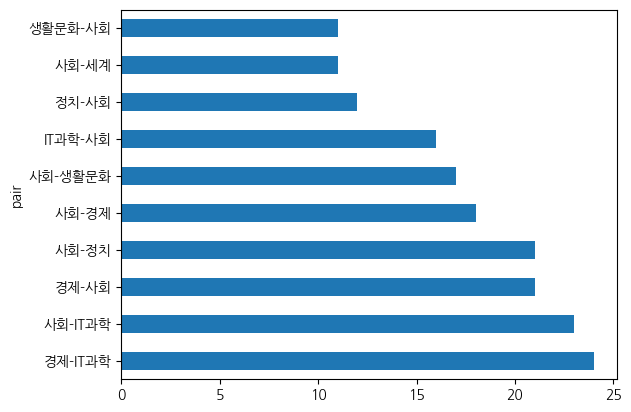

In [19]:
# plt.rcParams['font.family'] = 'NanumGothic'

# count pair
wrong_pred['pair'].value_counts()

# visualize top-10 pair
wrong_pred['pair'].value_counts()[:10].plot(kind='barh')

In [20]:
# print text if the pair is "경제-IT과학"
wrong_pred[wrong_pred['pair'] == '경제-IT과학']['text']

111                노치 디스플레이 스마트폰 올해 3억대 판매 예상
125             3분기 무선이어폰 시장서 샤오미 애플 이어 2위 진입
181                 모바일 콘텐츠 사어 버렴네…삼성전자 읻딴 철수
260           갤노트5·아이폰6s 싸졌다…재고소진 위해 공시지원금 늘려
564              LG G6 출시 이틀 만에 3만대 판매…산뜻한 출발
645              KT인텔 평창 5G 위해 맞손…네트워크·플랫폼 결합
827                             골드퍼시픽 꽐리종모 캐제
891                     SK텔레콤 5월 갤S8 구매 혜택 풍성
898                   CJ헬로비전 LTE 최저가 유심요금제 출시
1021            휴대전화 고가 요금제 경쟁 본격화…소비자 부담 커지나
1166        SKT 천재 해커 CEO 영입…인공지능 연구 누구나 설립종합
1216    그래픽 애플 1분기 아이폰7 2천150만대 판매…글로벌 점유율 1위
1233                 게시판 SKT 설맞이 T데이터 쿠폰 프로모션
1276                페이코로 기념일 챙기세요…모바일 기프트샵 출시
1367                웍스모바일 라인웍스 글로벌 고객사 2만곳 돌파
1439              갤S8 예약판매 노트7 40만대 넘긴다…판촉 공세
1443               현대모비스 자율주행차 엠빌리 전세계 도로 달린다
1512          휴대전화 구매 일단 9월 15일 이후로…대기수요 증가종합
1953                삼성전자 갓스물 고객에 스피커·삼성뮤직 이용권
1990          게시판 올레tv 키즈 월정액 독서서비스 대교 북클럽 출시
2009             페이스북 메신저 대화창에 광고 붙인다…새 돈줄 될까
2032             아이폰8 다음달 3일 국내 출시

In [21]:
wrong_pred[wrong_pred['pair'] == 'IT과학-경제']['text']

324     삼성 스마트폰 중국 점유율 3% 반토막…토종브랜드에 밀려
358           LG유플러스 비즈스카이프 다섣 씨에 퇴근하세요
603         달라진 아파트 청약시장…통장 아끼고 무순위 노린다
611        LG전자 G6 24일 유럽시장 출사표…24개국 대상
808         한국 쭈도 수중 통신 표주 니건 국쩨표주느로 승인
815         매직마이크로 네덜란드 광반도체 업체 지분취득 예정
998      기업은행 법인카드 1장당 최대 100명 간편결제 서비스
1025        3분기 스팸신고 불법게임·도박 1위…휴대폰판매도↑
1777         SK CC 롯데손해보험 전산시스템 AI로 고도화
1948            중국발 증설 러시…반도체 치킨게임 재연되나
Name: text, dtype: object

In [27]:
# print all text if the target is "사회"

# To display all columns
pd.set_option('display.max_columns', None)

# To display all rows
pd.set_option('display.max_rows', None)

wrong_pred[wrong_pred['target'] == '사회']

,text,target,pred,pair
35,홍세섭 영모도부터 김환기 서예까지…정동1928아트센터 개관전,사회,생활문화,사회-생활문화
81,알뜰폰 공짜라더니… 노인 울리는 공짜폰 주의보,사회,IT과학,사회-IT과학
87,부산소식 동서대 디자인대학 수업 작품 옥외광고전 수상,사회,생활문화,사회-생활문화
89,톈궁 1호 9시16분 남태평양 추락…과기부 위기경보 해제,사회,IT과학,사회-IT과학
120,기자간담회 하는 박정호 SK텔레콤 사장,사회,IT과학,사회-IT과학
167,금융 샌드박스에 88개사가 105개 서비스 신청,사회,경제,사회-경제
171,추석 다음날 서울 곳곳 나들이객 북적…눈도 귀도 즐거워,사회,생활문화,사회-생활문화
172,네이버 뉴스 편집에 이용자 참여…100억 구독펀드 조성종합,사회,IT과학,사회-IT과학
194,오렌지라이프 임원들 자사주 매각 보도는 사실무근,사회,경제,사회-경제
201,작지만 큰 울림으로…전북 마을 미디어 네트워크 창립,사회,생활문화,사회-생활문화
